In [1]:
from SOM_plus_clustering.som import SOM
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bonds_df = pd.read_csv("Atomic-Bond/Datas/cleared_data.csv")
elems_df = pd.read_csv("Elements\Datas\clear_encoded_data.csv")
fg_df = pd.read_csv("Functional-Group\Datas\clear_encoded_data.csv")
mw_df = pd.read_csv("Elements\Datas\molecular_weights.csv")
print(bonds_df.shape)
print(elems_df.shape)
print(fg_df.shape)
print(mw_df.shape)

(62087, 49)
(62087, 10)
(62087, 27)
(62087, 1)


In [3]:
frames = [bonds_df, elems_df, fg_df, mw_df]
result = pd.concat(frames, axis=1)
#check if there is any non null data
[i for i in list(result.isnull().sum()) if i != 0]

[]

In [4]:
class minmaxscaler:
    def __init__(self, multiplier_value) -> None:
        self.multiplier = multiplier_value
        pass
    def fit(self, X):
        self.min_value = min(X)
        self.max_value = max(X)
        self.scale = 1/(self.max_value - self.min_value)
    def fit_transform(self, X):
        self.min_value = min(X)
        self.max_value = max(X)
        self.scale = 1/(self.max_value - self.min_value)
        return [(i - self.min_value)*self.scale*self.multiplier for i in X]
    def inverse_transform(self, X):
        return [i/self.scale/self.multiplier+self.min_value for i in X]

(array([ 1070.,  3241.,  8133., 12335., 12060., 12164.,  7543.,  2904.,
         1694.,   943.]),
 array([150.1056 , 185.24041, 220.37522, 255.51003, 290.64484, 325.77965,
        360.91446, 396.04927, 431.18408, 466.31889, 501.4537 ]),
 <BarContainer object of 10 artists>)

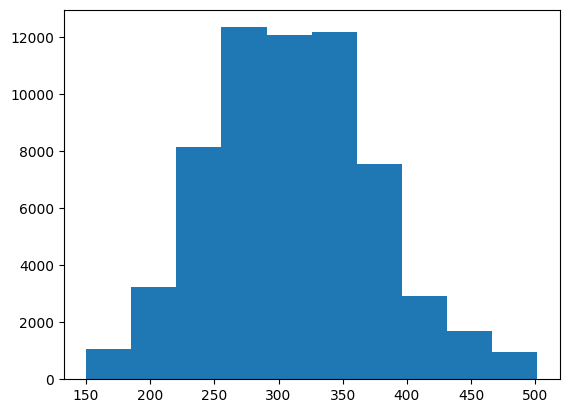

In [5]:
plt.hist(list(result["weight"]))

(array([ 1070.,  3241.,  8133., 12335., 12060., 12164.,  7543.,  2904.,
         1694.,   943.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

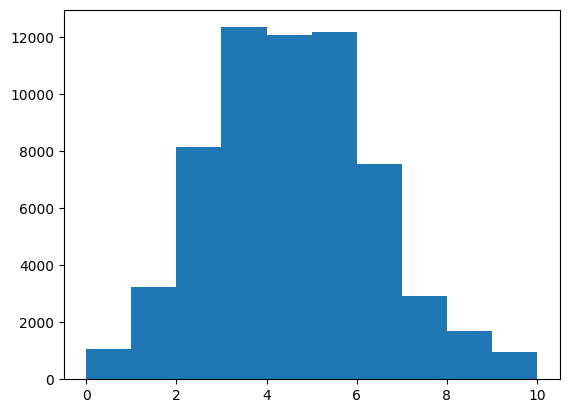

In [7]:
scaler = minmaxscaler(10)
rescaled_weight = scaler.fit_transform(list(result["weight"]))
plt.hist(rescaled_weight)

In [8]:
result["weight"] = rescaled_weight
result

,"('N', 'O', 2)","('P', 'O', 2)","('O', 'S', 1)","('C', 'O', 1)","('C', 'O', 1.5)","('I', 'C', 1)","('C', 'N', 3)","('O', 'O', 1)","('N', 'Cl', 1)","('N', 'H', 1)",...,sulfoxide,azido,nitroso,phospate,phospite,isothio,thioamide,aromatic,cycle,weight
0,0,0,0,1,0,0,2,0,0,1,...,0,0,0,0,0,0,0,1,2,7.506965
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,4.900547
2,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,2,4.328750
3,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,1,0,4.247511
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,2,2,3.564246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62082,0,0,0,2,2,0,0,0,0,1,...,0,0,0,0,0,0,0,2,1,6.294003
62083,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,2,1,2.966653
62084,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,1,3,3.880340
62085,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,2,2.969608


In [9]:
X = result.values
pca = PCA(n_components=0.9)
pca.fit(X)
transformed_data = pca.transform(X)
transformed_data.shape

(62087, 5)

In [10]:
pca.explained_variance_ratio_

array([0.5819852 , 0.18385124, 0.07257347, 0.04758074, 0.02754281])

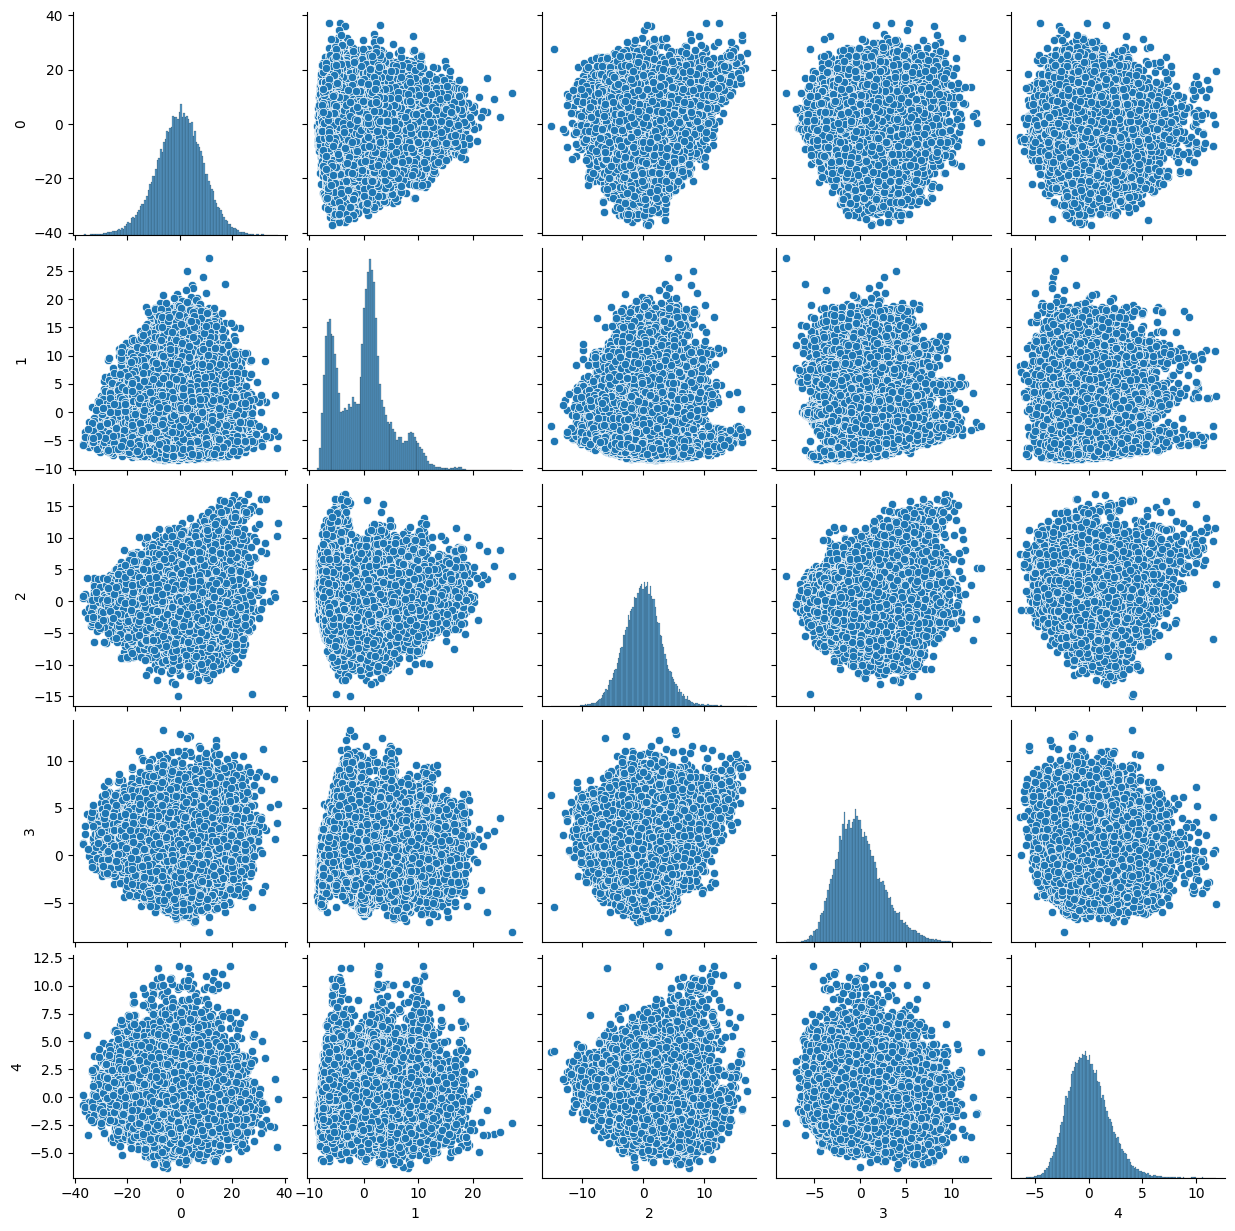

In [11]:
pca_df = pd.DataFrame(transformed_data)
sns.pairplot(pca_df)

Training   | [██████████████████████████████████████- ] 96% 

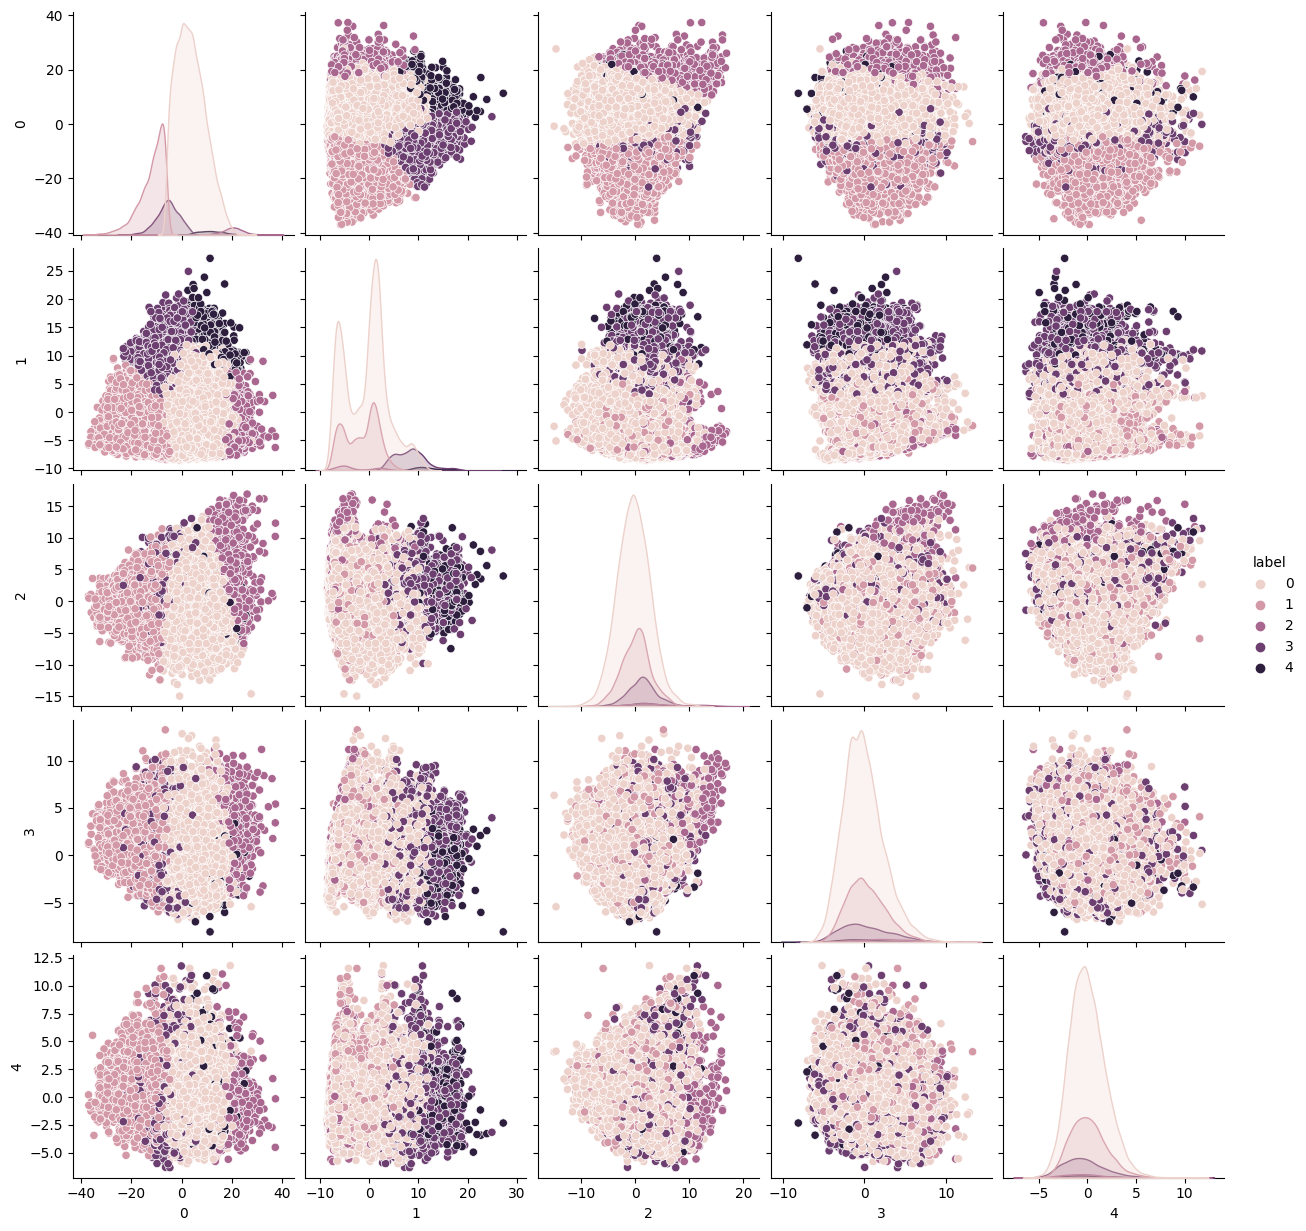

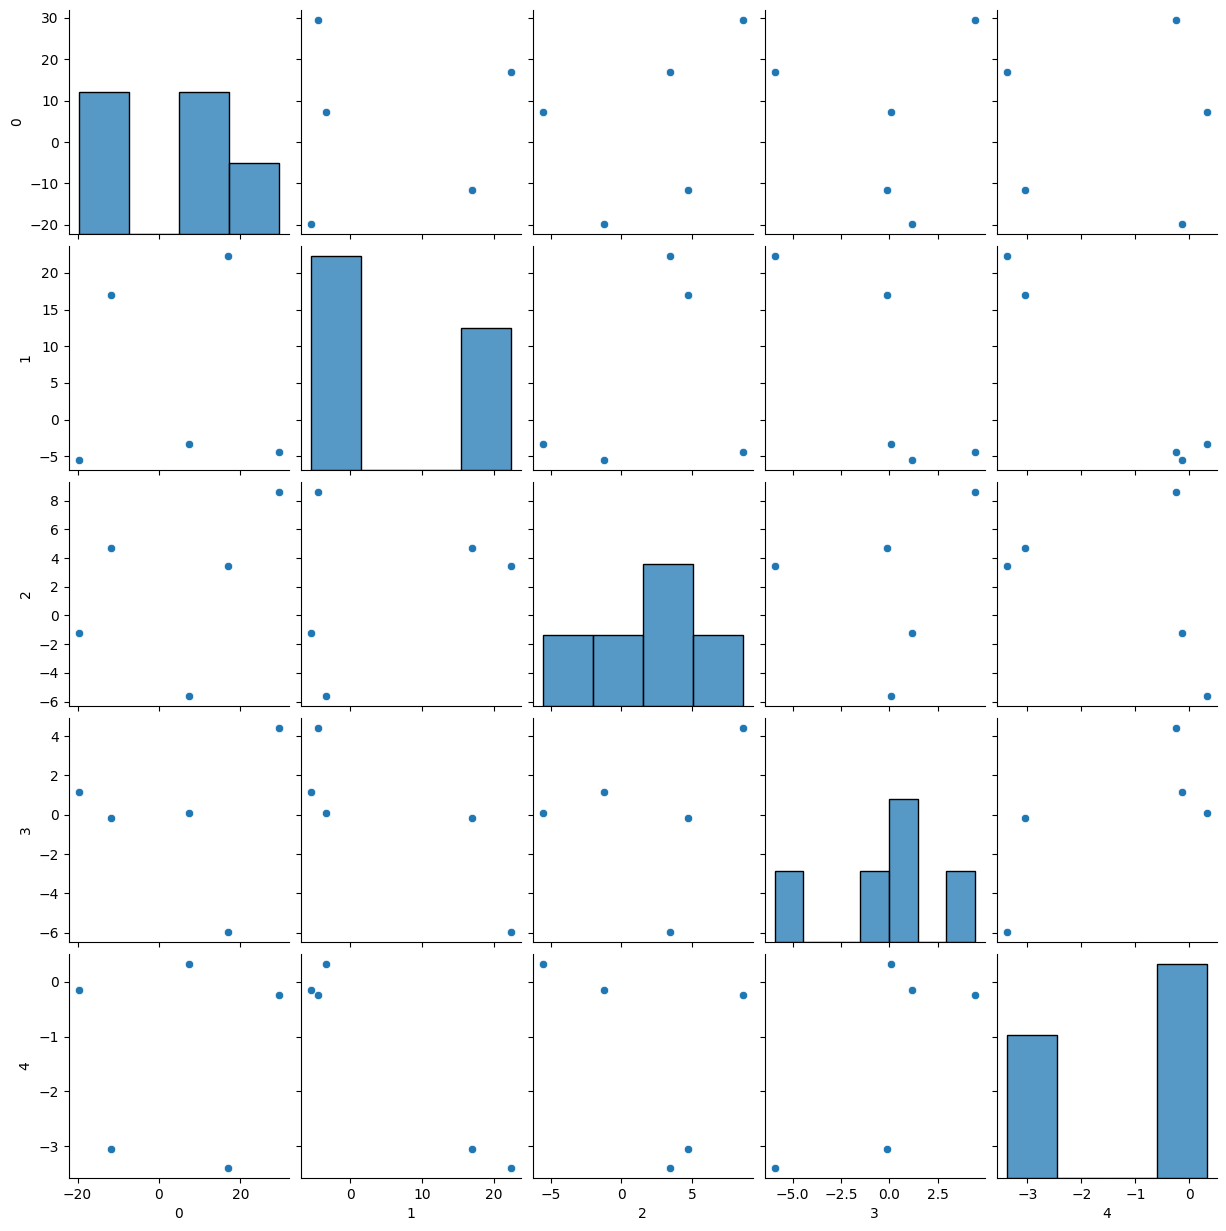

In [14]:
X = transformed_data
clustering_model = SOM(m = 1,
                    n = 5, 
                    dim=X.shape[1],
                    max_iter=None,
                    initiate_method="SOM++",
                    learning_rate=0.5,
                    neighbour_rad=1.5)
clustering_model.fit(X, epoch=30)
pred = clustering_model.predict(X)
plot_df = pd.DataFrame(pca_df)
plot_df["label"] = pred
sns.pairplot(plot_df, hue="label", corner=False)
sns.pairplot(pd.DataFrame(clustering_model.cluster_center_))

In [26]:
cluster_data = pd.DataFrame(pca.inverse_transform( clustering_model.cluster_center_), columns=result.columns)
cluster_data["weight"] = scaler.inverse_transform(list(cluster_data["weight"]))
converted_cluster = cluster_data[cluster_data > 0.05].dropna(axis=1)
converted_cluster

,"('C', 'O', 1)","('C', 'O', 1.5)","('N', 'H', 1)","('S', 'O', 2)","('C', 'S', 1)","('N', 'C', 1)","('C', 'C', 1)","('C', 'C', 1.5)","('C', 'H', 1)",C,H,N,O,amines,ether,sulfoxide,cycle,weight
0,0.069837,0.062826,3.197427,0.081850,0.135783,9.841532,9.043456,1.603899,26.709002,15.932303,29.992251,4.545890,0.968446,3.467953,0.060817,0.081850,1.817357,307.586276
1,0.607692,0.145433,2.184077,0.191470,0.574939,3.037722,4.949234,0.358284,9.709032,7.771841,12.246631,2.579157,1.555291,1.220323,0.086716,0.191470,0.971386,209.485230
2,2.769710,0.059659,0.748743,0.080324,0.110384,4.526389,24.050720,0.425567,40.297689,25.528068,41.361087,1.537639,3.422542,1.536970,1.179908,0.080324,4.397688,409.289740
3,1.035865,0.415388,1.120081,0.130395,0.499151,0.627765,5.290268,18.260595,13.074651,22.593678,14.658073,2.274133,1.954175,0.212460,0.335463,0.130395,1.124291,407.514278
4,0.981705,0.372483,1.748232,0.070722,0.116981,4.011352,8.303725,23.589073,31.967490,32.150765,34.038963,2.588954,0.672007,1.446299,0.550143,0.070722,0.976177,490.443168


In [36]:
converted_cluster.to_csv("reduced_cluster_center_data.csv")
converted_cluster.round(3).to_excel("reduced_cluster_center_data.xlsx")

In [37]:
cluster_data.to_csv("cluster_center_data.csv")
cluster_data.round(3).to_excel("cluster_center_data.xlsx")

In [38]:
result["label"] = pred
result

,"('N', 'O', 2)","('P', 'O', 2)","('O', 'S', 1)","('C', 'O', 1)","('C', 'O', 1.5)","('I', 'C', 1)","('C', 'N', 3)","('O', 'O', 1)","('N', 'Cl', 1)","('N', 'H', 1)",...,azido,nitroso,phospate,phospite,isothio,thioamide,aromatic,cycle,weight,label
0,0,0,0,1,0,0,2,0,0,1,...,0,0,0,0,0,0,1,2,7.506965,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,4.900547,0
2,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,2,4.328750,1
3,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,1,0,4.247511,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,2,2,3.564246,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62082,0,0,0,2,2,0,0,0,0,1,...,0,0,0,0,0,0,2,1,6.294003,0
62083,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,2,1,2.966653,0
62084,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,1,3,3.880340,0
62085,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,2,2.969608,0


In [39]:
result.to_csv("labeled_data.csv")

In [40]:
lc_df = pd.DataFrame([pred.count(i) for i in np.unique(pred)], columns=["count"])
lc_df.to_csv("label_count.csv")
lc_df.to_excel("label_count.xlsx")
lc_df

,count
0,42902
1,12965
2,891
3,4700
4,629


In [47]:
import os
import glob

path = 'Stats/Distribution/'

files = glob.glob(path + '*')
for f in files:
    os.remove(f)
for columns in converted_cluster.columns:
    bin = int(np.max(result[columns]))
    sns.histplot(x = result[columns], kde=True, bins=bin)
    plt.savefig(path+"/{}.png".format(columns))
    plt.clf()

<Figure size 640x480 with 0 Axes>